<a href="https://colab.research.google.com/github/alam740/Data-Analytics-Course/blob/master/Lecture_8_3_Factors%2C_2_Levels_Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lectures 8: DOE by Taguchi and Fractional Factorial and ANOVA


This notebook accompanies the ECE595 Data analytics course taught at Purdue in Fall 2022. These set of examples pertain to the materials of lecture 08.

Written by Rohan Sheridan (sherida7@purdue.edu)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import operator
import collections
from sklearn.linear_model import LinearRegression

In [ ]:
## Set up the arrays for 3 factor, 2 level problem

x =   np.asarray([[-1., -1.,  1., -1.,  1.,  1., -1.],
                  [ 1., -1., -1., -1., -1.,  1.,  1.],
                  [-1.,  1., -1., -1.,  1., -1.,  1.],
                  [ 1.,  1.,  1., -1., -1., -1., -1.],
                  [-1., -1.,  1.,  1., -1., -1.,  1.],
                  [ 1., -1., -1.,  1.,  1., -1., -1.],
                  [-1.,  1., -1.,  1., -1.,  1., -1.],
                  [ 1.,  1.,  1.,  1.,  1.,  1.,  1.]])

y = np.transpose(np.asarray(
    [['(1)','a','b','ab','c','ac','bc','abc'],
     [67., 79., 61., 75., 59., 90., 52., 87.]]))

 
print(np.append(x,y,axis=1))


## Remove row labels becuase it affects array data type
## Strings in array force entire array to have string data type
## Cannot multiply strings and floats...

y = np.transpose(np.asarray(
     [[67., 79., 61., 75., 59., 90., 52., 87.]]))


vars = ['A','B','C','AB','BC','AC','ABC']

effects = {}

## initialize effects dictionary

for var in vars:

  effects[var] = 0

print("\n")

for i in range(len(vars)):

  effect = np.dot(x[:,i],y)/4

  effects[vars[i]] = effect[0]


effects = np.asarray(sorted(effects.items(), 
                       key=operator.itemgetter(1)))


label = effects[:,0]
value = effects[:,1].astype('float')

print("\nFactor: ", label,
      "\nEffect: ", value, '\n')

[['-1.0' '-1.0' '1.0' '-1.0' '1.0' '1.0' '-1.0' '(1)' '67.0']
 ['1.0' '-1.0' '-1.0' '-1.0' '-1.0' '1.0' '1.0' 'a' '79.0']
 ['-1.0' '1.0' '-1.0' '-1.0' '1.0' '-1.0' '1.0' 'b' '61.0']
 ['1.0' '1.0' '1.0' '-1.0' '-1.0' '-1.0' '-1.0' 'ab' '75.0']
 ['-1.0' '-1.0' '1.0' '1.0' '-1.0' '-1.0' '1.0' 'c' '59.0']
 ['1.0' '-1.0' '-1.0' '1.0' '1.0' '-1.0' '-1.0' 'ac' '90.0']
 ['-1.0' '1.0' '-1.0' '1.0' '-1.0' '1.0' '-1.0' 'bc' '52.0']
 ['1.0' '1.0' '1.0' '1.0' '1.0' '1.0' '1.0' 'abc' '87.0']]



Factor:  ['B' 'AC' 'ABC' 'C' 'AB' 'BC' 'A'] 
Effect:  [-5.   0.   0.5  1.5  1.5 10.  23. ] 



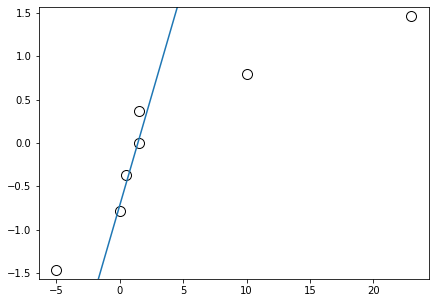

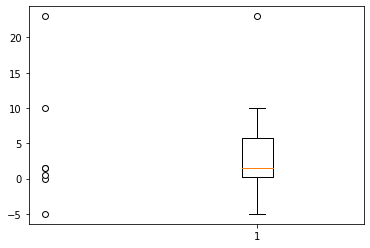

In [ ]:

i = np.arange(1,len(value)+1,1)


fi = (i - 0.5)/(len(value))

qi = 4.91*(fi**(0.14) - (1 - fi)**(0.14))

plt.figure(1,(7,5))
plt.scatter(value,qi,
            c='w',edgecolors='black',s=100)


reg = LinearRegression().fit(value[1:4].reshape(-1, 1), 
                             qi[1:4].reshape(-1, 1))

yfit = reg.coef_*value + reg.intercept_

plt.plot(value,yfit[0,:])

offset = 0.1

plt.ylim([min(qi) - offset,
          max(qi) + offset])

plt.show()

plt.boxplot(value)
plt.scatter(0*value,value,
            c='w',edgecolors='black',s=35)
print("\n\n")

plt.show()




